**#Import important librarys**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt

**#Import excel files for datasets**

**#Import Company X - Order Report.xlsx**

In [ ]:
order= pd.read_excel('Company X - Order Report.xlsx')

In [ ]:
df = order[['ExternOrderNo']]
order

,ExternOrderNo,SKU,Order Qty
0,2001827036,8904223818706,1.0
1,2001827036,8904223819093,1.0
2,2001827036,8904223819109,1.0
3,2001827036,8904223818430,1.0
4,2001827036,8904223819277,1.0
...,...,...,...
395,2001806229,8904223818942,1.0
396,2001806229,8904223818850,1.0
397,2001806226,8904223818850,2.0
398,2001806210,8904223816214,1.0


**#Import Company X - Pincode Zones.xlsx**

In [ ]:
pincode_zone = pd.read_excel('/content/Company X - Pincode Zones.xlsx')
pincode_zone

,Warehouse Pincode,Customer Pincode,Zone
0,121003,507101,d
1,121003,486886,d
2,121003,532484,d
3,121003,143001,b
4,121003,515591,d
...,...,...,...
119,121003,325207,b
120,121003,303702,b
121,121003,313301,b
122,121003,173212,e


**#Import Company X - SKU Master.xlsx**

In [ ]:
master = pd.read_excel('/content/Company X - SKU Master.xlsx')
master.head()

,SKU,Weight (g)
0,8904223815682,210
1,8904223815859,165
2,8904223815866,113
3,8904223815873,65
4,8904223816214,120


**#Import Comapny - Invoice.xlsx**


In [ ]:
invoice = pd.read_excel('/content/Courier Company - Invoice.xlsx')
invoice

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.)
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4
...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,121003,325207,d,Forward charges,90.2
120,1091117614452,2001809383,0.50,121003,303702,d,Forward and RTO charges,86.7
121,1091120922803,2001820978,0.50,121003,313301,d,Forward charges,45.4
122,1091121844806,2001811475,0.50,121003,173212,b,Forward charges,33.0


**#Import Company -Rates.xlsx **

In [ ]:
rates = pd.read_excel('/content/Courier Company - Rates.xlsx')
rates

,Zone,Weight Slabs,Forward Fixed Charge,Forward Additional Weight Slab Charge,RTO Fixed Charge,RTO Additional Weight Slab Charge
0,A,0.50,29.5,23.6,13.6,23.6
1,B,1.00,33.0,28.3,20.5,28.3
2,C,1.25,40.1,38.9,31.9,38.9
3,D,1.50,45.4,44.8,41.3,44.8
4,E,2.00,56.6,55.5,50.7,55.5


**#Find totel weight in (kg) for each order number

Merging two datframes master and order on the basis of SKU column after then applying group by on the basis of order number**

In [ ]:
temp  = master.merge(order,how = 'inner',on = 'SKU')
temp['totl_weight (Kg)'] = (temp['Weight (g)']*temp['Order Qty'])/1000

temp.drop_duplicates()

temp_d = temp.groupby('ExternOrderNo',as_index = False ).sum('totl_weight (Kg),totel_item_price')

temp_d=temp_d.merge(df).drop_duplicates()
temp_d

,ExternOrderNo,Weight (g),Order Qty,totl_weight (Kg)
0,2001806210,220,2.0,0.220
2,2001806226,240,2.0,0.480
3,2001806229,500,3.0,0.500
6,2001806232,377,8.0,1.302
8,2001806233,245,2.0,0.245
...,...,...,...,...
380,2001821995,477,2.0,0.477
382,2001822466,352,10.0,1.376
384,2001823564,336,6.0,0.672
387,2001825261,611,13.0,1.557


**#Merge invoice with temp_df and concate with pincode_zone**

In [ ]:
temp_invoice = invoice.merge(temp_d,how = 'inner',left_on = 'Order ID',right_on = 'ExternOrderNo')
final= pd.concat([temp_invoice,pincode_zone],axis = 1)

final.columns.values[14] = 'Zone_by_company'
final.head(10)

,AWB Code,Order ID,Charged Weight,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Weight (g),Order Qty,totl_weight (Kg),Warehouse Pincode,Customer Pincode,Zone_by_company
0,1091117222124,2001806232,1.30,121003,507101,d,Forward charges,135.0,2001806232,377,8.0,1.302,121003,507101,d
1,1091117222194,2001806273,1.00,121003,486886,d,Forward charges,90.2,2001806273,615,4.0,0.615,121003,486886,d
2,1091117222931,2001806408,2.50,121003,532484,d,Forward charges,224.6,2001806408,929,12.0,2.265,121003,532484,d
3,1091117223244,2001806458,1.00,121003,143001,b,Forward charges,61.3,2001806458,700,2.0,0.700,121003,143001,b
4,1091117229345,2001807012,0.15,121003,515591,d,Forward charges,45.4,2001807012,240,1.0,0.240,121003,515591,d
5,1091117229555,2001806686,0.15,121003,326502,d,Forward charges,45.4,2001806686,240,1.0,0.240,121003,326502,d
6,1091117229776,2001806885,1.00,121003,208019,b,Forward charges,61.3,2001806885,420,4.0,0.840,121003,208019,b
7,1091117323112,2001807058,1.15,121003,140301,b,Forward charges,89.6,2001807058,1168,6.0,1.168,121003,140301,b
8,1091117323812,2001807186,0.50,121003,396001,d,Forward charges,45.4,2001807186,500,3.0,0.500,121003,396001,d
9,1091117324206,2001807290,0.50,121003,711106,d,Forward charges,45.4,2001807290,500,3.0,0.500,121003,711106,d


In [ ]:
np.ceil(0.515/0.5)*0.5/0.5-1

1.0

**#Calculating the excpeted charges by the company X**

In [ ]:
# weight slab  calculate by courier company
def slab_calculate():
  slab = []
  for i in final.index:
    d = final.iloc[i]
    if d['Zone'] == 'd':
     slab.append(np.ceil(d['Charged Weight']/1.25)*1.25)
    elif d['Zone'] == 'a':
      slab.append(np.ceil(d['Charged Weight']/.25)*.25)
    elif d['Zone'] == 'b':
      slab.append(np.ceil(d['Charged Weight']/.50)*.50)
    elif d['Zone'] == 'c':
      slab.append(np.ceil(d['Charged Weight']/.75)*.75)
    elif d['Zone'] == 'e':
      slab.append(np.ceil(d['Charged Weight']/1.00)*1.00)
  return slab


final.insert(loc = 3,
          column = 'weight_slab',
          value = slab_calculate())

In [ ]:
# weight slab calculate by company x
def slab_calculater_X():
  slab = []
  for i in final.index:
    d = final.iloc[i]
    if d['Zone_by_company'] == 'd':
      slab.append(np.ceil(d['totl_weight (Kg)']/1.25)*1.25)
    elif d['Zone_by_company'] == 'a':
      slab.append(np.ceil(d['totl_weight (Kg)']/.25)*.25)
    elif d['Zone_by_company'] == 'b':
      slab.append(np.ceil(d['totl_weight (Kg)']/.50)*.50)
    elif d['Zone_by_company'] == 'c':
      slab.append(np.ceil(d['totl_weight (Kg)']/.75)*.75)
    elif d['Zone_by_company'] == 'e':
      slab.append(np.ceil(d['totl_weight (Kg)']/1.00)*1.00)
  return slab

final.insert(loc = 11,
          column = 'weight_slab_by_X',
          value = slab_calculater_X())

In [ ]:
#Exceute final

final

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Weight (g),weight_slab_by_X,Order Qty,totl_weight (Kg),Warehouse Pincode,Customer Pincode,Zone_by_company
0,1091117222124,2001806232,1.30,2.50,121003,507101,d,Forward charges,135.0,2001806232,377,2.50,8.0,1.302,121003,507101,d
1,1091117222194,2001806273,1.00,1.25,121003,486886,d,Forward charges,90.2,2001806273,615,1.25,4.0,0.615,121003,486886,d
2,1091117222931,2001806408,2.50,2.50,121003,532484,d,Forward charges,224.6,2001806408,929,2.50,12.0,2.265,121003,532484,d
3,1091117223244,2001806458,1.00,1.00,121003,143001,b,Forward charges,61.3,2001806458,700,1.00,2.0,0.700,121003,143001,b
4,1091117229345,2001807012,0.15,1.25,121003,515591,d,Forward charges,45.4,2001807012,240,1.25,1.0,0.240,121003,515591,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,1.25,121003,325207,d,Forward charges,90.2,2001812941,500,0.50,3.0,0.500,121003,325207,b
120,1091117614452,2001809383,0.50,1.25,121003,303702,d,Forward and RTO charges,86.7,2001809383,607,1.00,3.0,0.607,121003,303702,b
121,1091120922803,2001820978,0.50,1.25,121003,313301,d,Forward charges,45.4,2001820978,515,1.00,2.0,0.515,121003,313301,b
122,1091121844806,2001811475,0.50,0.50,121003,173212,b,Forward charges,33.0,2001811475,689,1.00,4.0,0.689,121003,173212,e


In [ ]:
charge = []
for i in final.index:
  d =  final.iloc[i]
  if d['Zone_by_company'] =='d':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 45.4
        additional_charge = 44.8*(d['weight_slab_by_X']/1.25-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 45.4+41.3
        additional_charge = 2*44.8*(d['weight_slab_by_X']/1.25-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)
  elif d['Zone_by_company'] =='b':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 33
        additional_charge = 28.3*(d['weight_slab_by_X']/0.5-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 33+20.5
        additional_charge = 2*28.3*(d['weight_slab_by_X']/0.5-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)

  elif d['Zone_by_company'] =='e':
    if d['Type of Shipment'] == 'Forward charges':
        fixed_charge = 56.6
        additional_charge = 55.5*(d['weight_slab_by_X']-1)
        totel_charge = fixed_charge+additional_charge
        charge.append(totel_charge)
    elif d['Type of Shipment'] == 'Forward and RTO charges':
        fixed_charge = 56.6+50.5
        additional_charge = 2*55.5*(d['weight_slab_by_X']-1)
        totel_charge= fixed_charge+additional_charge
        charge.append(totel_charge)


In [ ]:
#calculate COD Charges
def cod():
  cod_charge = []
  for i in final.index:
    d = final.iloc[i]
    if d['Payment Mode'] == 'Prepaid':
      cod_charge.append(0)
    elif d['Payment Mode'] == 'COD':
      if d['totel_item_price'] > 300:
        charge = d['totel_item_price']*0.05
        cod_charge.append(charge)
      elif d['totel_item_price'] < 300:
        cod_charge.append(15)
  return cod_charge


In [ ]:

final.head()

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Weight (g),weight_slab_by_X,Order Qty,totl_weight (Kg),Warehouse Pincode,Customer Pincode,Zone_by_company
0,1091117222124,2001806232,1.30,2.50,121003,507101,d,Forward charges,135.0,2001806232,377,2.50,8.0,1.302,121003,507101,d
1,1091117222194,2001806273,1.00,1.25,121003,486886,d,Forward charges,90.2,2001806273,615,1.25,4.0,0.615,121003,486886,d
2,1091117222931,2001806408,2.50,2.50,121003,532484,d,Forward charges,224.6,2001806408,929,2.50,12.0,2.265,121003,532484,d
3,1091117223244,2001806458,1.00,1.00,121003,143001,b,Forward charges,61.3,2001806458,700,1.00,2.0,0.700,121003,143001,b
4,1091117229345,2001807012,0.15,1.25,121003,515591,d,Forward charges,45.4,2001807012,240,1.25,1.0,0.240,121003,515591,d


In [ ]:
charge_df  = pd.DataFrame(charge,columns = ['charges'])
final_df = pd.concat([final,round(charge_df,2)],axis = 1)

In [ ]:
charge_df

,charges
0,90.2
1,45.4
2,90.2
3,61.3
4,45.4
...,...
119,33.0
120,110.1
121,61.3
122,56.6


In [ ]:
final_df

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Weight (g),weight_slab_by_X,Order Qty,totl_weight (Kg),Warehouse Pincode,Customer Pincode,Zone_by_company,charges
0,1091117222124,2001806232,1.30,2.50,121003,507101,d,Forward charges,135.0,2001806232,377,2.50,8.0,1.302,121003,507101,d,90.2
1,1091117222194,2001806273,1.00,1.25,121003,486886,d,Forward charges,90.2,2001806273,615,1.25,4.0,0.615,121003,486886,d,45.4
2,1091117222931,2001806408,2.50,2.50,121003,532484,d,Forward charges,224.6,2001806408,929,2.50,12.0,2.265,121003,532484,d,90.2
3,1091117223244,2001806458,1.00,1.00,121003,143001,b,Forward charges,61.3,2001806458,700,1.00,2.0,0.700,121003,143001,b,61.3
4,1091117229345,2001807012,0.15,1.25,121003,515591,d,Forward charges,45.4,2001807012,240,1.25,1.0,0.240,121003,515591,d,45.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1091118551656,2001812941,0.73,1.25,121003,325207,d,Forward charges,90.2,2001812941,500,0.50,3.0,0.500,121003,325207,b,33.0
120,1091117614452,2001809383,0.50,1.25,121003,303702,d,Forward and RTO charges,86.7,2001809383,607,1.00,3.0,0.607,121003,303702,b,110.1
121,1091120922803,2001820978,0.50,1.25,121003,313301,d,Forward charges,45.4,2001820978,515,1.00,2.0,0.515,121003,313301,b,61.3
122,1091121844806,2001811475,0.50,0.50,121003,173212,b,Forward charges,33.0,2001811475,689,1.00,4.0,0.689,121003,173212,e,56.6


**#Calculate total charge**

In [ ]:
final_df['totel_charges'] = final_df['charges']
final_df['difference b/w charges'] =round((final_df['totel_charges'] -final_df['Billing Amount (Rs.)']) ,2)

final_df.sample(10)

,AWB Code,Order ID,Charged Weight,weight_slab,Warehouse Pincode,Customer Pincode,Zone,Type of Shipment,Billing Amount (Rs.),ExternOrderNo,Weight (g),weight_slab_by_X,Order Qty,totl_weight (Kg),Warehouse Pincode,Customer Pincode,Zone_by_company,charges,totel_charges,difference b/w charges
86,1091121306101,2001820690,0.15,1.25,121003,313003,d,Forward charges,45.4,2001820690,65,0.50,1.0,0.065,121003,313003,b,33.0,33.0,-12.4
36,1091117222135,2001806233,0.78,1.00,121003,263139,b,Forward charges,61.3,2001806233,245,0.50,2.0,0.245,121003,263139,b,33.0,33.0,-28.3
52,1091117323005,2001807036,1.64,2.50,121003,516503,d,Forward charges,179.8,2001807036,451,2.50,13.0,1.459,121003,516503,d,90.2,90.2,-89.6
31,1091117957780,2001811192,1.13,1.25,121003,562110,d,Forward and RTO charges,258.9,2001811192,696,1.25,9.0,1.032,121003,562110,d,86.7,86.7,-172.2
120,1091117614452,2001809383,0.50,1.25,121003,303702,d,Forward and RTO charges,86.7,2001809383,607,1.00,3.0,0.607,121003,303702,b,110.1,110.1,23.4
74,1091119169701,2001815688,0.20,1.25,121003,302017,d,Forward charges,45.4,2001815688,220,0.50,2.0,0.220,121003,302017,b,33.0,33.0,-12.4
95,1091117324346,2001807328,2.28,2.50,121003,335502,d,Forward charges,224.6,2001807328,490,0.50,1.0,0.490,121003,335502,b,33.0,33.0,-191.6
24,1091119398844,2001816684,0.99,1.25,121003,394210,d,Forward and RTO charges,172.8,2001816684,340,1.25,8.0,0.920,121003,394210,d,86.7,86.7,-86.1
18,1091117435661,2001808295,0.20,1.00,121003,673002,e,Forward and RTO charges,107.3,2001808295,245,1.00,2.0,0.245,121003,673002,e,107.1,107.1,-0.2
37,1091117222146,2001806251,1.27,2.50,121003,743263,d,Forward charges,135.0,2001806251,245,1.25,2.0,0.245,121003,743263,d,45.4,45.4,-89.6


**##Extract desire column from final_df & final**

In [ ]:
output_data = final_df[['Order ID','AWB Code','totl_weight (Kg)','weight_slab_by_X','Charged Weight','weight_slab',
                             'Zone_by_company','Zone','totel_charges','Billing Amount (Rs.)','difference b/w charges']]

In [ ]:
output_data=output_data.rename(columns = {'totl_weight (Kg)e':'totel_weight (Kg)','totel_charges':' Expected Charge as per X (Rs.)',
                                            'Zone':'zone_courier_company','totel_charges':'Expected Charges'})

In [ ]:
output_data

,Order ID,AWB Code,totl_weight (Kg),weight_slab_by_X,Charged Weight,weight_slab,Zone_by_company,zone_courier_company,Expected Charges,Billing Amount (Rs.),difference b/w charges
0,2001806232,1091117222124,1.302,2.50,1.30,2.50,d,d,90.2,135.0,-44.8
1,2001806273,1091117222194,0.615,1.25,1.00,1.25,d,d,45.4,90.2,-44.8
2,2001806408,1091117222931,2.265,2.50,2.50,2.50,d,d,90.2,224.6,-134.4
3,2001806458,1091117223244,0.700,1.00,1.00,1.00,b,b,61.3,61.3,0.0
4,2001807012,1091117229345,0.240,1.25,0.15,1.25,d,d,45.4,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.500,0.50,0.73,1.25,b,d,33.0,90.2,-57.2
120,2001809383,1091117614452,0.607,1.00,0.50,1.25,b,d,110.1,86.7,23.4
121,2001820978,1091120922803,0.515,1.00,0.50,1.25,b,d,61.3,45.4,15.9
122,2001811475,1091121844806,0.689,1.00,0.50,0.50,e,b,56.6,33.0,23.6


**##Find the number of correctly_charge, overcharge, and undercharge and add them up.**

In [ ]:
correctly = []
overcharged = []
undercharged =  []
for i in final_df.index:
  d = final_df.iloc[i]
  if d['difference b/w charges'] == 0:
    correctly.append(d['totel_charges'])
  elif d['difference b/w charges'] <0:
    overcharged.append(d['difference b/w charges'])
  elif d['difference b/w charges'] >0:
    undercharged.append(d['difference b/w charges'])

In [ ]:
output_data

,Order ID,AWB Code,totl_weight (Kg),weight_slab_by_X,Charged Weight,weight_slab,Zone_by_company,zone_courier_company,Expected Charges,Billing Amount (Rs.),difference b/w charges
0,2001806232,1091117222124,1.302,2.50,1.30,2.50,d,d,90.2,135.0,-44.8
1,2001806273,1091117222194,0.615,1.25,1.00,1.25,d,d,45.4,90.2,-44.8
2,2001806408,1091117222931,2.265,2.50,2.50,2.50,d,d,90.2,224.6,-134.4
3,2001806458,1091117223244,0.700,1.00,1.00,1.00,b,b,61.3,61.3,0.0
4,2001807012,1091117229345,0.240,1.25,0.15,1.25,d,d,45.4,45.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119,2001812941,1091118551656,0.500,0.50,0.73,1.25,b,d,33.0,90.2,-57.2
120,2001809383,1091117614452,0.607,1.00,0.50,1.25,b,d,110.1,86.7,23.4
121,2001820978,1091120922803,0.515,1.00,0.50,1.25,b,d,61.3,45.4,15.9
122,2001811475,1091121844806,0.689,1.00,0.50,0.50,e,b,56.6,33.0,23.6


**##Export dataset in to Excel sheet**

In [ ]:
output_data.to_excel('output.xlsx')

In [ ]:
output_data.head(35)

,Order ID,AWB Code,totl_weight (Kg),weight_slab_by_X,Charged Weight,weight_slab,Zone_by_company,zone_courier_company,Expected Charges,Billing Amount (Rs.),difference b/w charges
0,2001806232,1091117222124,1.302,2.50,1.30,2.50,d,d,90.2,135.0,-44.8
1,2001806273,1091117222194,0.615,1.25,1.00,1.25,d,d,45.4,90.2,-44.8
2,2001806408,1091117222931,2.265,2.50,2.50,2.50,d,d,90.2,224.6,-134.4
3,2001806458,1091117223244,0.700,1.00,1.00,1.00,b,b,61.3,61.3,0.0
4,2001807012,1091117229345,0.240,1.25,0.15,1.25,d,d,45.4,45.4,0.0
5,2001806686,1091117229555,0.240,1.25,0.15,1.25,d,d,45.4,45.4,0.0
6,2001806885,1091117229776,0.840,1.00,1.00,1.00,b,b,61.3,61.3,0.0
7,2001807058,1091117323112,1.168,1.50,1.15,1.50,b,b,89.6,89.6,0.0
8,2001807186,1091117323812,0.500,1.25,0.50,1.25,d,d,45.4,45.4,0.0
9,2001807290,1091117324206,0.500,1.25,0.50,1.25,d,d,45.4,45.4,0.0


**#Final Result**

In [ ]:
print(f"Total orders where X has been correctly charged  is {len(correctly)} and correctly charged amount is {round(sum(correctly),2)}")
print(f'Total Orders where X has been overcharged is  {len(overcharged)} and overcharged amount is {round(sum(overcharged),2)}')
print(f'Total Orders where X has been undercharged is {len(undercharged)}  and undercharged amount is {round(sum(undercharged),2)}')

Total orders where X has been correctly charged  is 13 and correctly charged amount is 774.0
Total Orders where X has been overcharged is  101 and overcharged amount is -6377.5
Total Orders where X has been undercharged is 10  and undercharged amount is 232.1


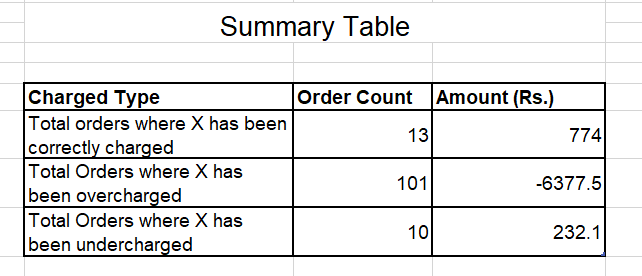